In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

# 【問題1】コンペティション内容の確認

## 何を学習し、何を予測するのか
返済が可能なクライアント

## どのようなファイルを作りKaggleに提出するか
「SK_ID_CURR」と「TARGET」（割合）の２項目をCSVファイルを提出する

## 提出されたものはどういった指標値で評価されるのか
予測値と実測値とのROC曲線の値で判定する

# 【問題2】学習と検証

## ① データ分析

In [2]:
# trainデータを読み込む
df_train = pd.read_csv('application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


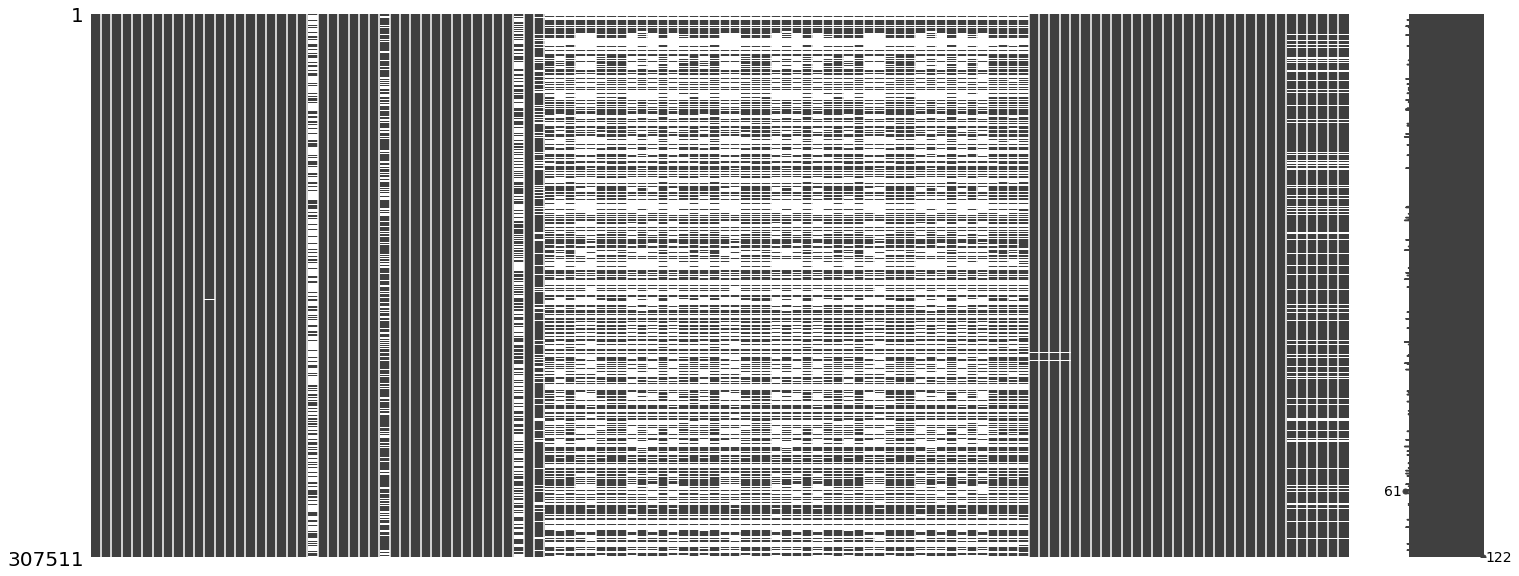

In [3]:
# 欠損値を視覚化
msno.matrix(df_train)

In [4]:
# 相関係数行列を求める
df_train_corr = df_train.corr()
df_train_corr.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448


In [5]:
# 目的変数と正の相関係数が高い順位にソートする
df_train_corr['TARGET'].sort_values(ascending=False).head(20)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
Name: TARGET, dtype: float64

In [6]:
# 目的変数と負の相関係数が高い順位にソートする
df_train_corr['TARGET'].sort_values(ascending=True).head(20)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64

## ② 前処理

In [7]:
# 相関関係の高い説明変数「EXT_SOURCE_1」「EXT_SOURCE_2」「EXT_SOURCE_3」と目的変数の「TRAGET」を取得する
df_X = df_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
ser_y = df_train['TARGET']

In [8]:
# NULLの値を平均で埋める
df_X['EXT_SOURCE_1'] = df_X['EXT_SOURCE_1'].fillna(df_X['EXT_SOURCE_1'].mean())
df_X['EXT_SOURCE_2'] = df_X['EXT_SOURCE_2'].fillna(df_X['EXT_SOURCE_2'].mean())
df_X['EXT_SOURCE_3'] = df_X['EXT_SOURCE_3'].fillna(df_X['EXT_SOURCE_3'].mean())

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [9]:
# ndarrayに変更
arr_X = df_X.values
arr_y = ser_y.values

In [10]:
# 訓練データ75%、検証データ25%として分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(arr_X, arr_y, test_size = 0.25, random_state = 0) 

In [11]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
scaler.fit(X_val)
X_val_std = scaler.transform(X_val)

In [12]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0) # ロジスティック回帰のインスタンスを生成
lr.fit(X_train_std, y_train)
y_val_pred = lr.predict_proba(X_val_std) # 予測

In [13]:
#  roc_auc_scoreで評価
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_val,y_val_pred[:,1]))

0.7179514314168118


# 【問題3】テストデータに対する推定

In [14]:
# testデータを読み込む
df_test = pd.read_csv('application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 相関関係の高い説明変数「EXT_SOURCE_1」「EXT_SOURCE_2」「EXT_SOURCE_3」と目的変数の「TRAGET」を取得する
df_X_test = df_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [16]:
# NULLの値を平均で埋める
df_X_test['EXT_SOURCE_1'] = df_X_test['EXT_SOURCE_1'].fillna(df_X_test['EXT_SOURCE_1'].mean())
df_X_test['EXT_SOURCE_2'] = df_X_test['EXT_SOURCE_2'].fillna(df_X_test['EXT_SOURCE_2'].mean())
df_X_test['EXT_SOURCE_3'] = df_X_test['EXT_SOURCE_3'].fillna(df_X_test['EXT_SOURCE_3'].mean())

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [17]:
# ndarrayに変更
X_test = df_X_test.values

In [18]:
# 標準化
scaler.fit(X_test)
X_test_std = scaler.transform(X_test)

In [19]:
y_test_pred = lr.predict_proba(X_test_std) # 予測

In [20]:
Xy_test_pred = pd.concat([df_test['SK_ID_CURR'], pd.Series(y_test_pred[:,1])], axis = 1)
Xy_test_pred.columns = ['SK_ID_CURR','TARGET']
Xy_test_pred.head()

,SK_ID_CURR,TARGET
0,100001,0.055780
1,100005,0.116867
2,100013,0.030516
3,100028,0.046583
4,100038,0.123230


In [21]:
# CSVファイルに出力してKaggleに提出
Xy_test_pred.to_csv('test.csv', header=True, index=False)

# 【問題4】特徴量エンジニアリング

## どの特徴量を使うか
「EXT_SOURCE_1」「EXT_SOURCE_2」「EXT_SOURCE_3」　・・・　相関係数の高い値
「CODE_GENDER」　・・・　質的データ
「AMT_CREDIT」「AMT_INCOME_TOTAL」　・・・　二つの特徴量より新しい特徴量を作る

In [22]:
# 相関関係の高い説明変数「EXT_SOURCE_1」「EXT_SOURCE_2」「EXT_SOURCE_3」と
# 「DAYS_BIRTH」「AMT_CREDIT」「AMT_INCOME_TOTAL」と
# 目的変数の「TRAGET」を取得する
df_X_2 = df_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','CODE_GENDER','AMT_CREDIT','AMT_INCOME_TOTAL']]
ser_y_2 = df_train['TARGET']

## どう前処理をするか

In [23]:
# 二つの特徴量より新しい特徴量を作る
df_X_2['AMT_RATIO'] = df_X_2['AMT_CREDIT'] / df_X_2['AMT_INCOME_TOTAL'] 
df_X_2.head()

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_RATIO
0,0.083037,0.262949,0.139376,-9461,M,406597.5,202500.0,2.007889
1,0.311267,0.622246,NaN,-16765,F,1293502.5,270000.0,4.790750
2,NaN,0.555912,0.729567,-19046,M,135000.0,67500.0,2.000000
3,NaN,0.650442,NaN,-19005,F,312682.5,135000.0,2.316167
4,NaN,0.322738,NaN,-19932,M,513000.0,121500.0,4.222222


In [24]:
# 質的データを量的データに変換
Xy_buf_2 = pd.get_dummies(df_X_2['CODE_GENDER'])
df_X_2 =pd.concat([df_X_2,Xy_buf_2],axis=1)
df_X_2.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_RATIO,F,M,XNA
0,0.083037,0.262949,0.139376,-9461,M,406597.5,202500.0,2.007889,0,1,0
1,0.311267,0.622246,NaN,-16765,F,1293502.5,270000.0,4.790750,1,0,0
2,NaN,0.555912,0.729567,-19046,M,135000.0,67500.0,2.000000,0,1,0
3,NaN,0.650442,NaN,-19005,F,312682.5,135000.0,2.316167,1,0,0
4,NaN,0.322738,NaN,-19932,M,513000.0,121500.0,4.222222,0,1,0


In [25]:
df_X_2.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_RATIO,F,M,XNA
count,134133.000000,3.068510e+05,246546.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.502130,5.143927e-01,0.510853,-16036.995067,5.990260e+05,1.687979e+05,3.957570,0.658344,0.341643,0.000013
std,0.211062,1.910602e-01,0.194844,4363.988632,4.024908e+05,2.371231e+05,2.689728,0.474266,0.474261,0.003607
min,0.014568,8.173617e-08,0.000527,-25229.000000,4.500000e+04,2.565000e+04,0.004808,0.000000,0.000000,0.000000
25%,0.334007,3.924574e-01,0.370650,-19682.000000,2.700000e+05,1.125000e+05,2.018667,0.000000,0.000000,0.000000
50%,0.505998,5.659614e-01,0.535276,-15750.000000,5.135310e+05,1.471500e+05,3.265067,1.000000,0.000000,0.000000
75%,0.675053,6.636171e-01,0.669057,-12413.000000,8.086500e+05,2.025000e+05,5.159880,1.000000,1.000000,0.000000
max,0.962693,8.549997e-01,0.896010,-7489.000000,4.050000e+06,1.170000e+08,84.736842,1.000000,1.000000,1.000000


In [26]:
# NULLの値を平均で埋める
df_X_2['EXT_SOURCE_1']=df_X_2['EXT_SOURCE_1'].fillna(df_X_2['EXT_SOURCE_1'].mean())
df_X_2['EXT_SOURCE_2']=df_X_2['EXT_SOURCE_2'].fillna(df_X_2['EXT_SOURCE_2'].mean())
df_X_2['EXT_SOURCE_3']=df_X_2['EXT_SOURCE_3'].fillna(df_X_2['EXT_SOURCE_3'].mean())

In [27]:
df_X_2.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_RATIO,F,M,XNA
count,307511.000000,3.075110e+05,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.502130,5.143927e-01,0.510853,-16036.995067,5.990260e+05,1.687979e+05,3.957570,0.658344,0.341643,0.000013
std,0.139395,1.908550e-01,0.174464,4363.988632,4.024908e+05,2.371231e+05,2.689728,0.474266,0.474261,0.003607
min,0.014568,8.173617e-08,0.000527,-25229.000000,4.500000e+04,2.565000e+04,0.004808,0.000000,0.000000,0.000000
25%,0.502130,3.929737e-01,0.417100,-19682.000000,2.700000e+05,1.125000e+05,2.018667,0.000000,0.000000,0.000000
50%,0.502130,5.654672e-01,0.510853,-15750.000000,5.135310e+05,1.471500e+05,3.265067,1.000000,0.000000,0.000000
75%,0.502130,6.634218e-01,0.636376,-12413.000000,8.086500e+05,2.025000e+05,5.159880,1.000000,1.000000,0.000000
max,0.962693,8.549997e-01,0.896010,-7489.000000,4.050000e+06,1.170000e+08,84.736842,1.000000,1.000000,1.000000


In [28]:
df_X_2.isnull().sum()

EXT_SOURCE_1        0
EXT_SOURCE_2        0
EXT_SOURCE_3        0
DAYS_BIRTH          0
CODE_GENDER         0
AMT_CREDIT          0
AMT_INCOME_TOTAL    0
AMT_RATIO           0
F                   0
M                   0
XNA                 0
dtype: int64

In [29]:
arr_X_2 = df_X_2[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_RATIO','F']].values
arr_y_2 = ser_y_2 .values

In [30]:
# 訓練データ75%、検証データ25%として分割
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(arr_X_2, arr_y_2, test_size = 0.25, random_state = 0) 

In [31]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()

scaler_2.fit(X_train_2)
X_train_std_2 = scaler_2.transform(X_train_2)

scaler_2.fit(X_test_2)
X_test_std_2 = scaler_2.transform(X_test_2)

In [32]:
# 学習と予測
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression()
lr_2.fit(X_train_std_2,y_train_2)
y_train_pred_2 = lr_2.predict_proba(X_train_std_2)
y_val_pred_2 = lr_2.predict_proba(X_test_std_2)

In [33]:
# 学習データと評価データの検証
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_2,y_train_pred_2[:,1]))
print(roc_auc_score(y_test_2,y_val_pred_2[:,1]))

0.7239643443035275
0.7232402566100562
